In [44]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [31]:
TARGET = "language"

# Data

In [32]:
df = pd.read_csv("ds1.csv")

In [33]:
df

,Unnamed: 0,text,language
0,0,"\n\nFelton tendit l’arme à Milady, qui en exam...",NaN
1,1,"\n\n— Diable! mais votre femme, mon cher monsi...",NaN
2,2,"You may possibly have some\nidea, Miss Trotwo...",NaN
3,3,"\n\n— Ah! ma foi! messieurs, dit Porthos en se...",NaN
4,4,"It warn’t\nhard, you may suppose, for a seafa...",NaN
...,...,...,...
3995,3995,»\r\n\r\nLe mouchoir était en effet richement ...,french
3996,3996,\r\n\r\nMilady était tombée sur sa chaise les ...,french
3997,3997,\r\nD’Artagnan entra derrière lui. Porthos al...,french
3998,3998,"I ought to have made it, perhaps, but\r\nI co...",english


In [26]:
df = df.drop("Unnamed: 0", axis=1)

In [27]:
df[df[TARGET].notna()]

,text,language
3200,\r\n\r\n«Vous avez une seconde pour vous décid...,french
3201,"’\r\n\r\n‘Oh, you are in low spirits, Mr. Mic...",english
3202,»\r\n\r\nLa pauvre enfant pensa tomber à la re...,french
3203,"That she would never\r\nwaver in it, never be...",english
3204,’\r\n\r\n‘It’s not the first loss I have had i...,english
...,...,...
3995,»\r\n\r\nLe mouchoir était en effet richement ...,french
3996,\r\n\r\nMilady était tombée sur sa chaise les ...,french
3997,\r\nD’Artagnan entra derrière lui. Porthos al...,french
3998,"I ought to have made it, perhaps, but\r\nI co...",english


<AxesSubplot: ylabel='language'>

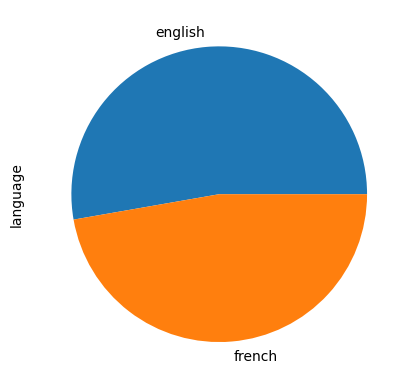

In [28]:
df[TARGET].value_counts().plot.pie()

# Preprocess

In [29]:
def f(x):
    x = str(x)
    x = x.replace("\n", "")
    return x.replace("\r", "")

df["text"] = df["text"].apply(f)

In [30]:
df

,text,language
0,"Felton tendit l’arme à Milady, qui en examina ...",NaN
1,"— Diable! mais votre femme, mon cher monsieur,...",NaN
2,"You may possibly have someidea, Miss Trotwood...",NaN
3,"— Ah! ma foi! messieurs, dit Porthos en se ren...",NaN
4,"It warn’thard, you may suppose, for a seafari...",NaN
...,...,...
3995,»Le mouchoir était en effet richement brodé et...,french
3996,Milady était tombée sur sa chaise les mains ét...,french
3997,D’Artagnan entra derrière lui. Porthos alla s...,french
3998,"I ought to have made it, perhaps, butI couldn...",english


# Model

In [37]:
chars = set()

for i, row in df[:3200].iterrows():
    chars = chars.union(row["text"].casefold())
    
chars

{'\n',
 ' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '«',
 '°',
 '»',
 'à',
 'â',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'î',
 'ï',
 'ñ',
 'ô',
 'ù',
 'û',
 'ü',
 'œ',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '…'}

In [38]:
fr_set = { 'à',
 'â',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'î',
 'ï',
 'ñ',
 'ô',
 'ù',
 'û',
 'ü',
 'œ'}

{'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ñ', 'ô', 'ù', 'û', 'ü', 'œ'}

# Model Evaluation

In [40]:
def model(s):
    res = "english"
    for c in s:
        if c in fr_set:
            return "french"
    return res

In [41]:
df["pred"] = df["text"].apply(model)

In [43]:
df[3200:]

,Unnamed: 0,text,language,pred
3200,3200,\r\n\r\n«Vous avez une seconde pour vous décid...,french,french
3201,3201,"’\r\n\r\n‘Oh, you are in low spirits, Mr. Mic...",english,english
3202,3202,»\r\n\r\nLa pauvre enfant pensa tomber à la re...,french,french
3203,3203,"That she would never\r\nwaver in it, never be...",english,english
3204,3204,’\r\n\r\n‘It’s not the first loss I have had i...,english,english
...,...,...,...,...
3995,3995,»\r\n\r\nLe mouchoir était en effet richement ...,french,french
3996,3996,\r\n\r\nMilady était tombée sur sa chaise les ...,french,french
3997,3997,\r\nD’Artagnan entra derrière lui. Porthos al...,french,french
3998,3998,"I ought to have made it, perhaps, but\r\nI co...",english,english


In [45]:
accuracy_score(df[3200:]["language"], df[3200:]["pred"])

0.99875

# Problem 2

## Part 1

Write a function Compare that computes the mean square error between a list of predicted values P and a list of expected values E. Both P and E have the same length.

The formula for the MSE is as follows:
  MSE = 1/n * SUM((Pi-Ei)**2)
  
 Now write a second function Fit. This function receives a list of 2D points (described as tuples), that correspond to the data we want to fit on a linear model of the form y=mx+b. The function also receives a series of candidate linear functions of the same form (described as tuples containing the m and b parameters). The purpose of this function is to determine the best fit from the candidate functions using the MSE as the selection criteria. 

Test sample 1
points = [[0, 0], [1, 1], [1.9, 2], [3, 3.2], [4, 4.1], [5, 5.11]]
candidates = [[1, 0], [2, 1], [0.5, 1], [1.01, 0], [1, 0.1]]


Test sample 2
points = [[13,46], [28,50], [46,49], [63,53], [93,81], [71,50], [89,53], [53,46], [58,30], [61,72], [67,37], [38,65]] 
candidates = [[0.1, 50], [0.14, 46], [0.18, 42], [0.25, 35], [0.5, 30]]

In [46]:
def Compare(Pi, Ei):
    n = len(Pi)
    return 1/n * np.sum((np.array(Pi) - np.array(Ei))**2)

In [57]:
def Fit(points, candidates):
    # candidate points
    cps = {}
    for i, (m, b) in enumerate(candidates):
        xs, ys = [], []
        for x, y in points:
            ys.append(y)
            xs.append(m*x+b)
        cps[Compare(xs, ys)] = (m, b)
    min_mse = min([v for v in list(cps.keys())])
    return cps[min_mse]

In [58]:
points = [[0, 0], [1, 1], [1.9, 2], [3, 3.2], [4, 4.1], [5, 5.11]]
candidates = [[1, 0], [2, 1], [0.5, 1], [1.01, 0], [1, 0.1]]

In [59]:
Fit(points, candidates)

(1, 0.1)

In [60]:
points = [[13,46], [28,50], [46,49], [63,53], [93,81], [71,50], [89,53], [53,46], [58,30], [61,72], [67,37], [38,65]]
candidates = [[0.1, 50], [0.14, 46], [0.18, 42], [0.25, 35], [0.5, 30]]

In [61]:
Fit(points, candidates)

(0.18, 42)